In [1]:
!pip install tensorflow-gpu==2.4.1
!pip install noisereduce
!pip install pydub

     |████████████████████████████████| 394.3MB 38kB/s 
  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp37-none-any.whl size=7610 sha256=a771dc1ff5bcd36136e958304b71268420b19393a2afaf603b17e3196db45999
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


In [2]:
import noisereduce as nr
import matplotlib.pyplot as plt
import numpy as np
import pydub
import IPython
import librosa

/usr/local/lib/python3.7/dist-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
file = '/example audio/input_example.m4a'
noise_data,noise_rate = librosa.load(file)
print(noise_rate)
noise_data

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


22050


array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -5.347937e-04,
       -9.961788e-05,  0.000000e+00], dtype=float32)

In [4]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

In [5]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip= noise_data + noise_clip

In [6]:
IPython.display.Audio(data=audio_clip, rate=noise_rate)

GPUs available: []


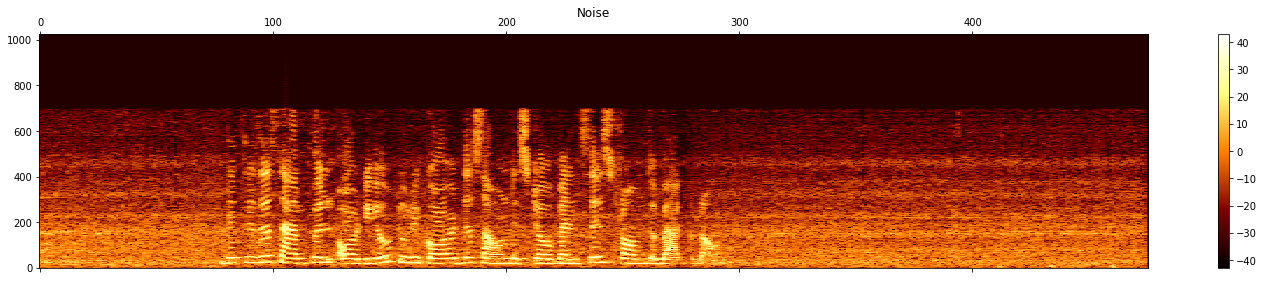

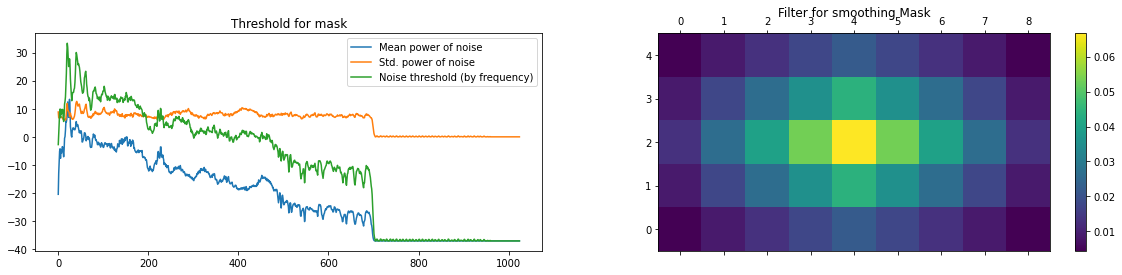

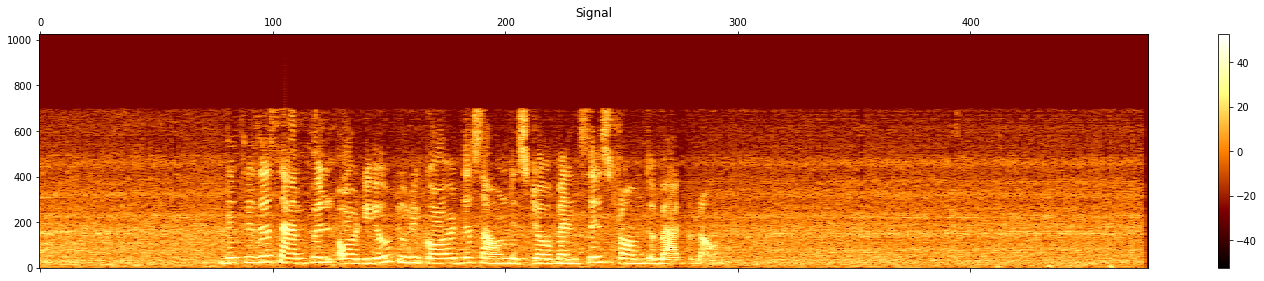

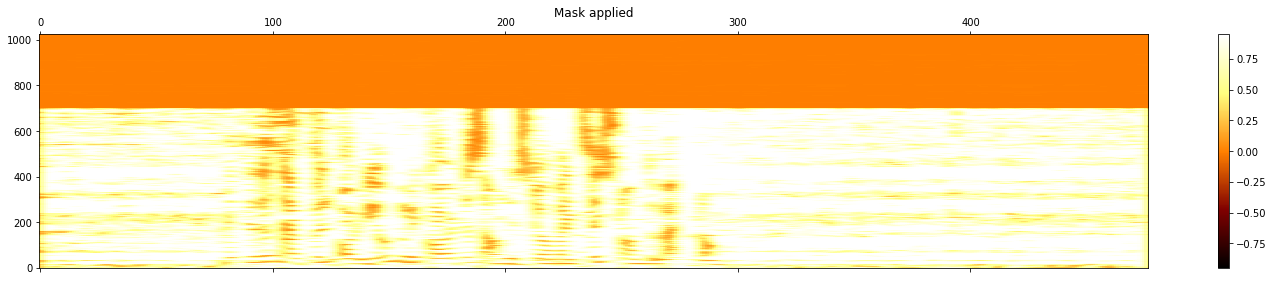

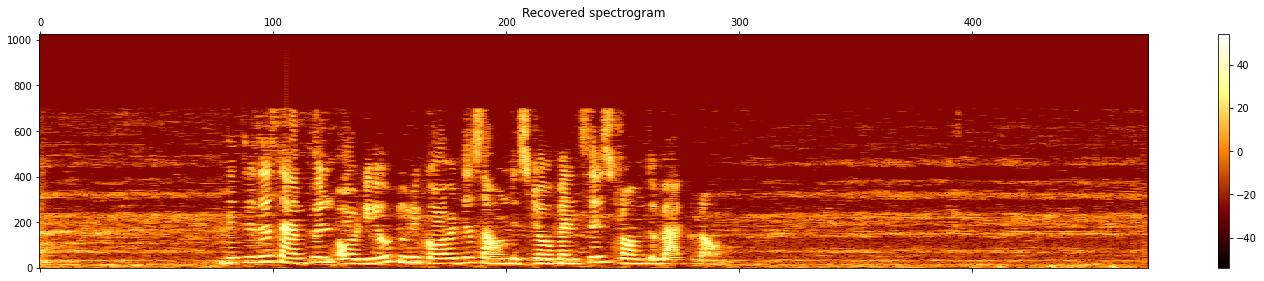

In [7]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip, 
                                noise_clip=noise_clip,
                                n_std_thresh=2,
                                prop_decrease=0.95,
                                use_tensorflow=True,
                                verbose=True)


In [8]:
IPython.display.Audio(data=noise_reduced, rate=noise_rate)

In [9]:
noise_reduced_louder = noise_reduced + 10  
IPython.display.Audio(data=noise_reduced, rate=noise_rate)